## Exercise 3 - **Reaction-Diffusion**

The goal of this exercise is to consolidate:
- 1D reaction-diffusion
- Non-dimensional numbers

The goal of this exercise is to combine reaction and diffusion processes acting on the concentration of a quantity $C$.

From what you learned in class, write an reaction-diffusion code having following physical input parameters:

```
# Physics
Lx    = 10.0  # domain length
D     = 0.4   # diffusion coefficient
ξ     = 10.0  # reaction rate
Ceq   = 0.4   # equilibrium concentration
ttot  = 2.0   # total simulation time
```

Discretise your domain in 128 finite-difference cells such that the first cell centre is located at `dx/2` and the last cell centre at `Lx-dx/2`. Use following explicit time step limiters:

```julia
dt    = dx^2/D/2.2
```

As initial condition, define a Gaussian profile of concentration `C` of amplitude and standard deviation equal to 1, located at `0.3*Lx`.

Keep the concentration at the boundaries at `C=0`.

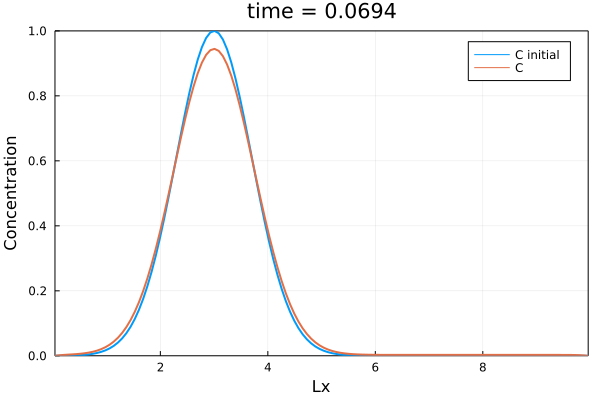

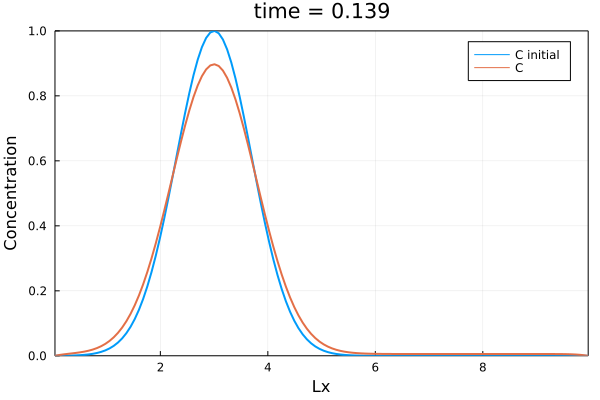

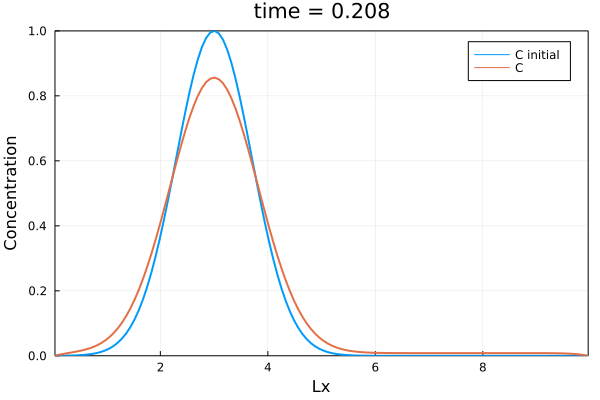

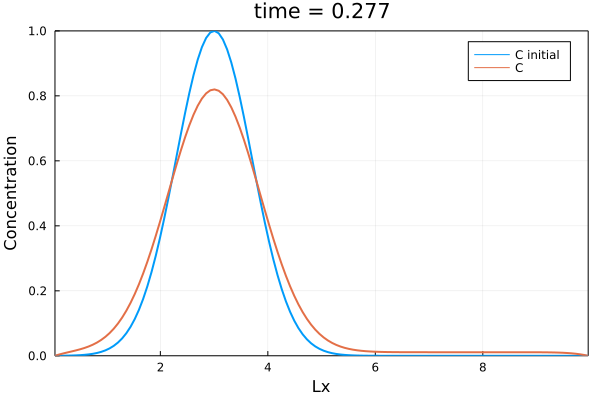

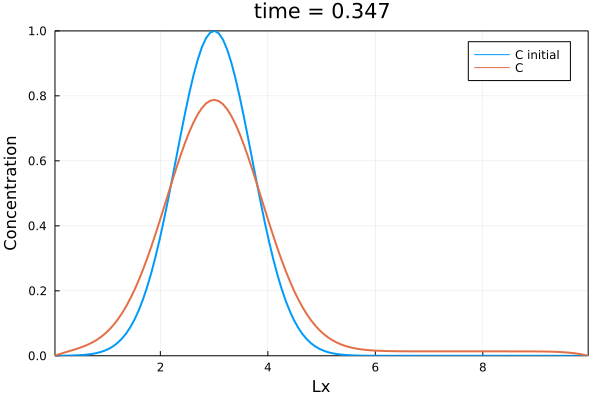

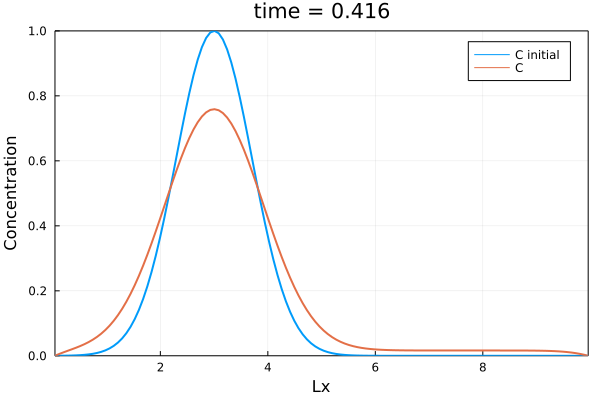

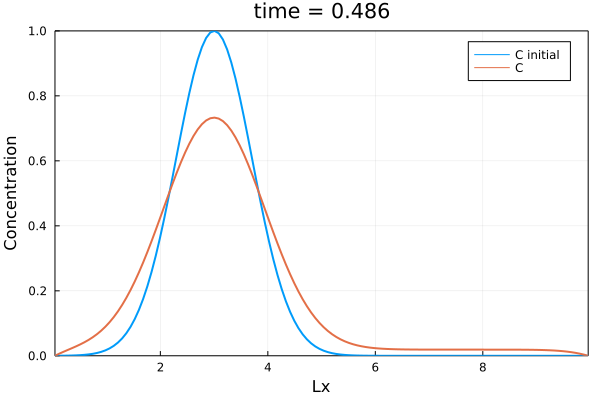

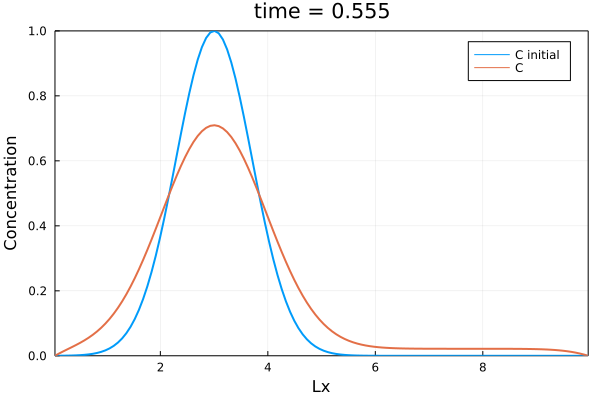

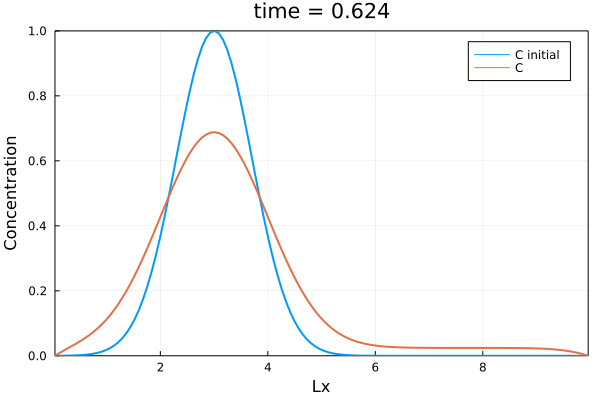

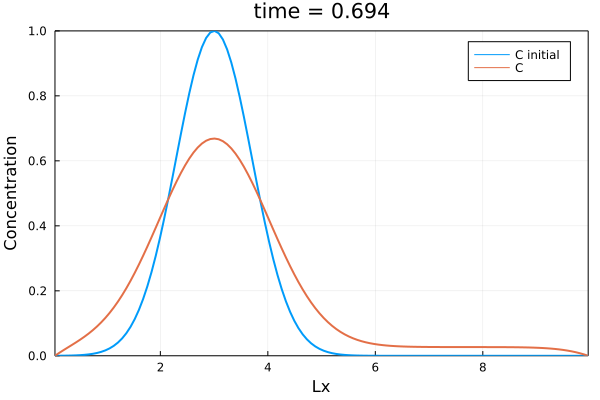

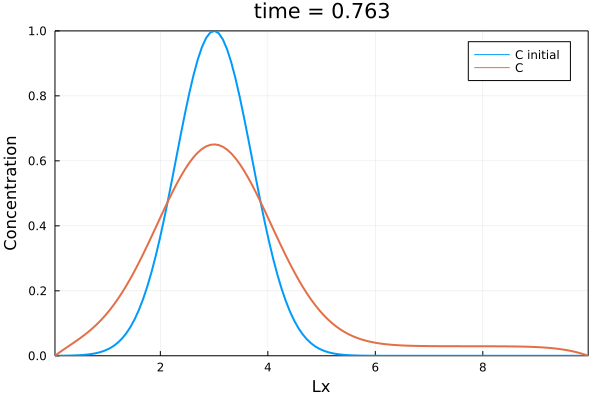

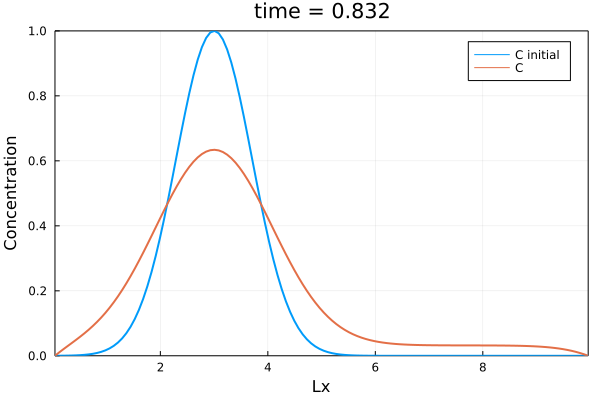

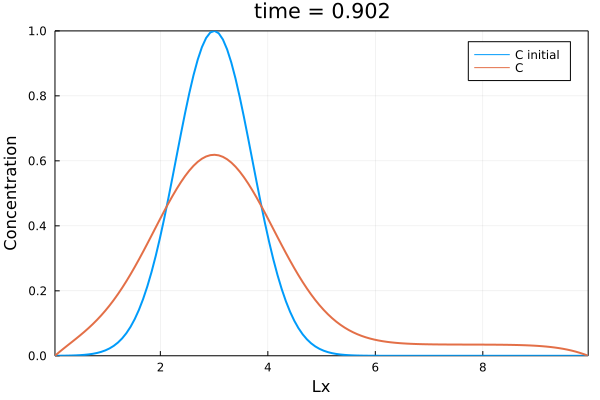

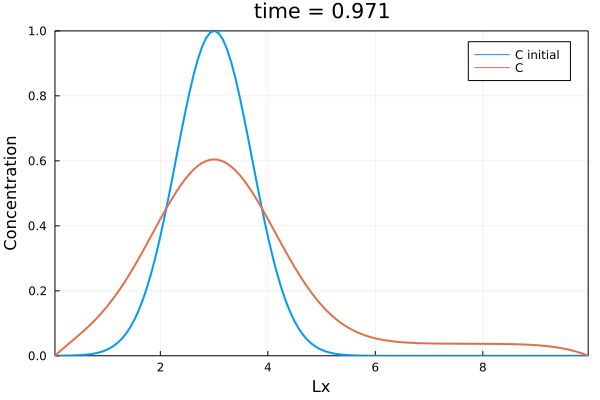

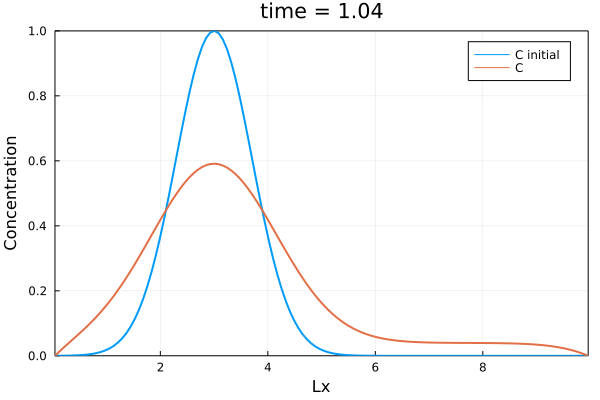

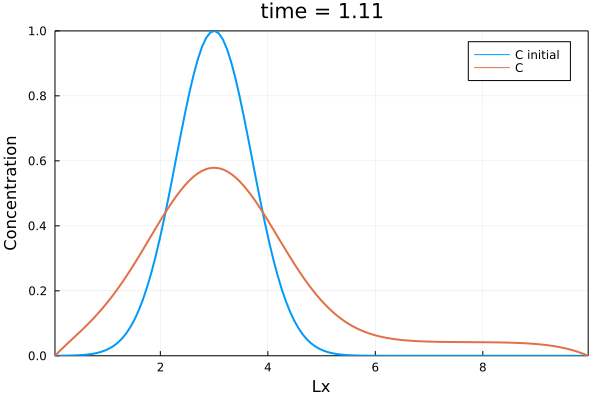

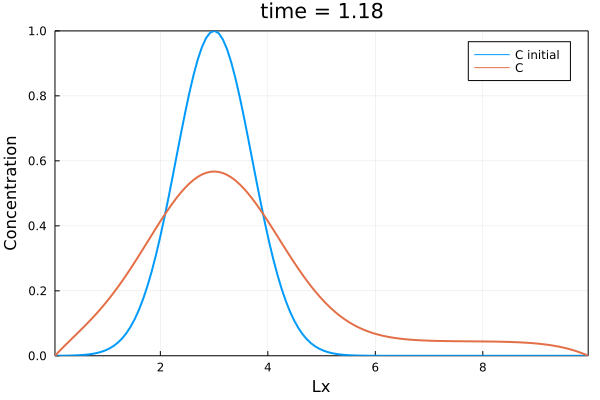

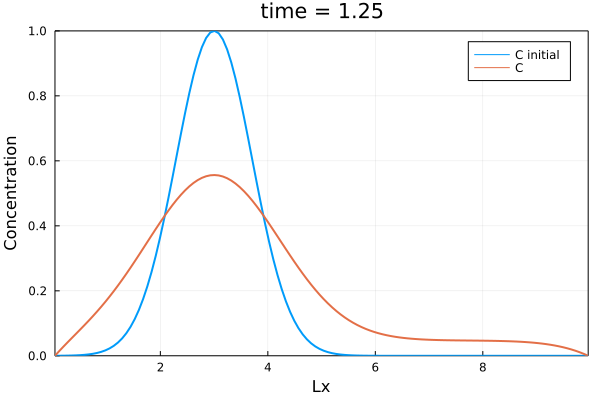

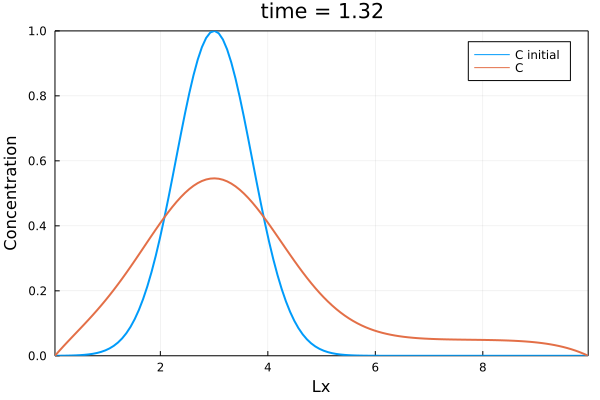

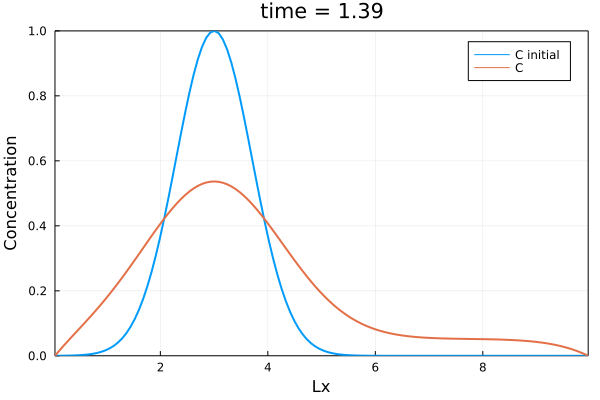

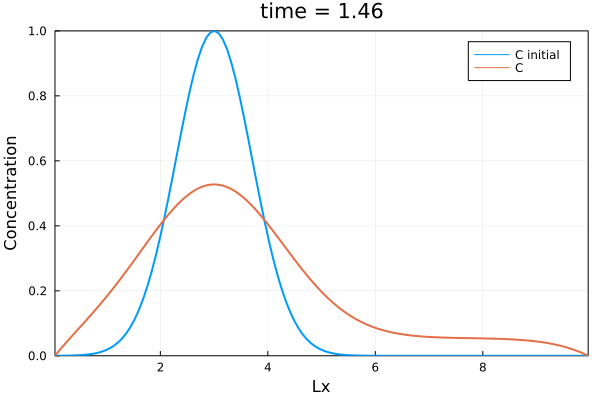

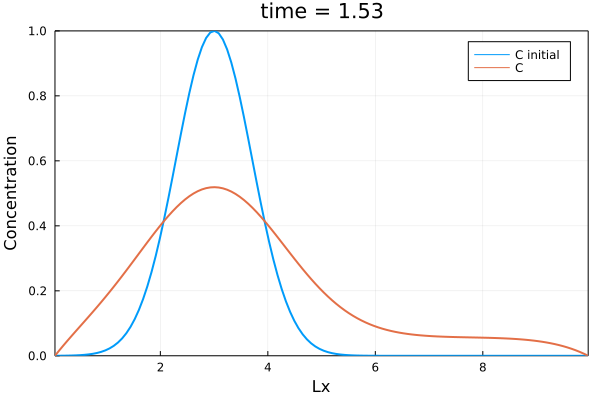

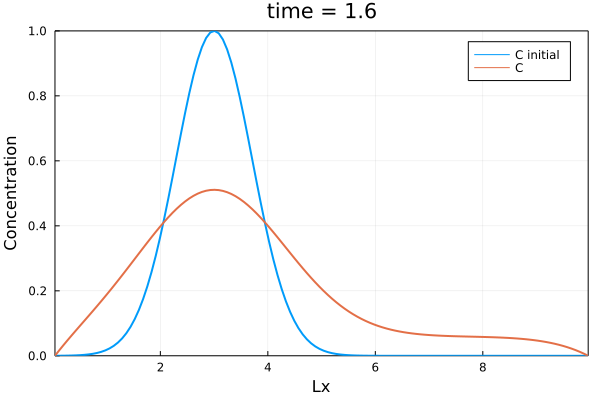

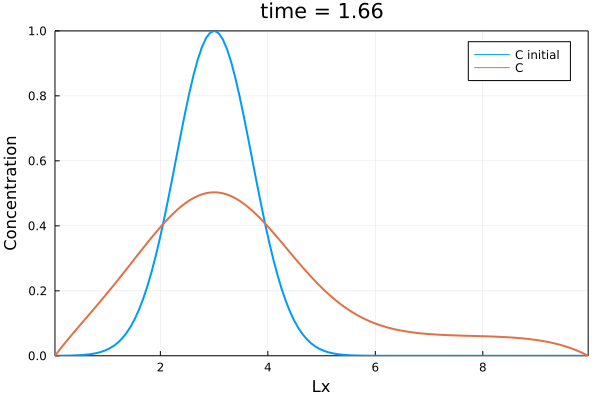

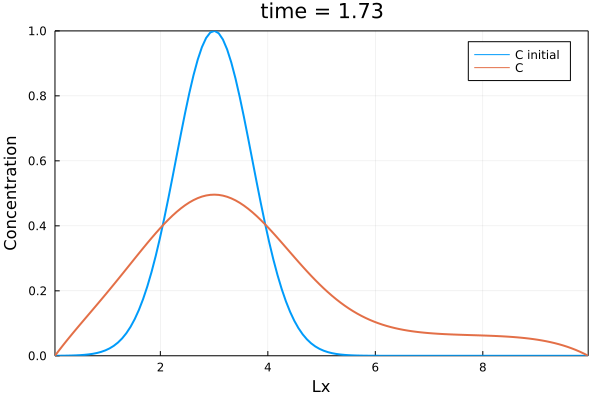

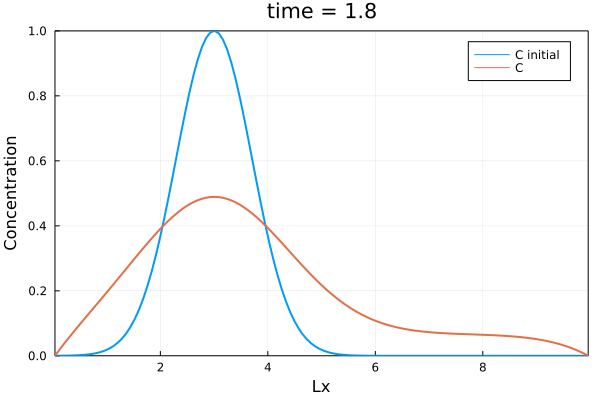

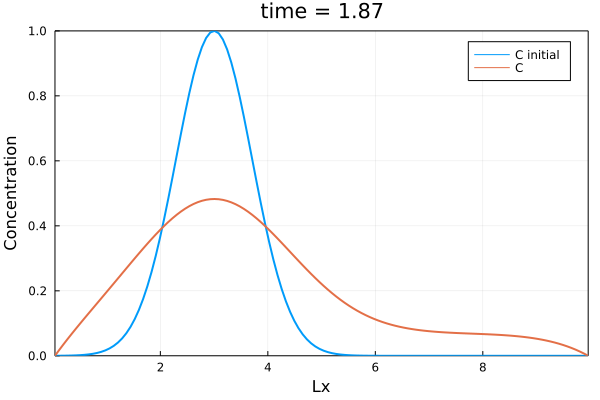

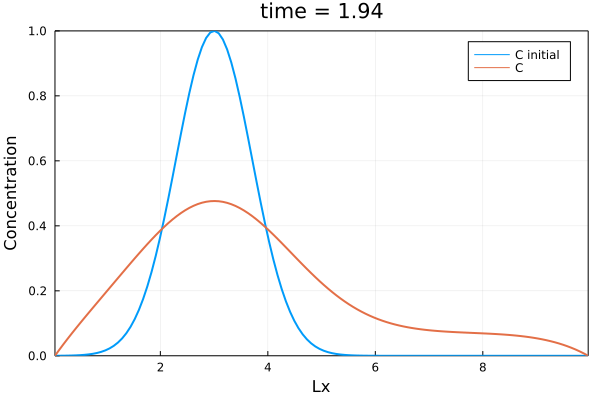

In [1]:
using Plots

# Physics
Lx    = 10.0  # domain length
D     = 0.4
ξ     = 10.0
ttot  = 2.0   # total simulation time
Ceq = 0.4

# Numerics
nx   = 128
nout = 10
# Derived numerics
dx   = Lx/nx
xc   = LinRange(dx/2, Lx-dx/2, nx)
dt    = dx^2/D/2.2
nt   = cld(ttot, dt)
# Array initialisation
C    =  exp.(.-(xc .- 0.3*Lx).^2)
Ci   =  copy(C)
dCdt = zeros(Float64, nx-2);
qx   = zeros(Float64, nx-1)
# Time loop
for it = 1:nt
    qx         .= .-D.*diff(C)./dx
    dCdt     .= (-(C .- Ceq)./ξ)[2:end-1] + .-diff(qx)./dx
    C[2:end-1] .= C[2:end-1] .+ dt.*dCdt
    # add solution
    if it % nout == 0
        # IJulia.clear_output(true); 
        plot(xc, Ci, lw=2, label="C initial")
        display(plot!(xc, C, lw=2, xlims=(xc[1], xc[end]), ylims=(0.0, 1.0), xlabel="Lx", ylabel="Concentration", title="time = $(round(it*dt, sigdigits=3))", framestyle=:box, label="C"))
        sleep(0.1)
    end
end

> 💡 hint: Don't forget to initialise (pre-allocate) all arrays (vectors) needed in the calculations.

### Question 1

Report the initial and final distribution of concentration on a figure with axis-label, title, and plotted line labels. Also, report on the figure (as text in one label of your choice) the maximal final concentration value and its $x$ location.

### Question 2

Repeat the exercise but introduce the non-dimensional [Damköhler number](https://en.wikipedia.org/wiki/Damköhler_numbers) $Da = L^2/D/ξ$ as physical quantity defining the diffusion coefficient D as a `# Derived physics` quantity. Confirm the if $Da < 0.1$ most of the mass diffuses away from $C_{eq}$, and the opposite holds for $Da > 10$.